In [1]:
!pip install OpenEXR

     -------------------------------------- 753.9/753.9 kB 1.1 MB/s eta 0:00:00


In [3]:
# read in all .exr files in current directory

import os
import numpy as np
import OpenEXR
import Imath
import matplotlib.pyplot as plt

# get all .exr files in current directory
files = [f for f in os.listdir('.') if os.path.isfile(f) and f.endswith('.exr')]

C:\Users\Jerome\AppData\Local\Temp\ipykernel_18520\1019399535.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  data = np.fromstring(data, dtype=np.float32)


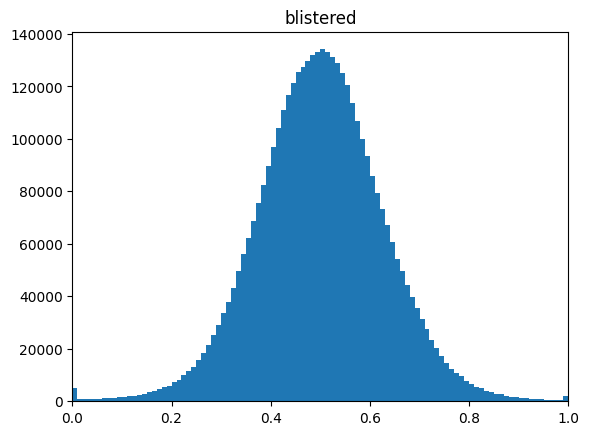

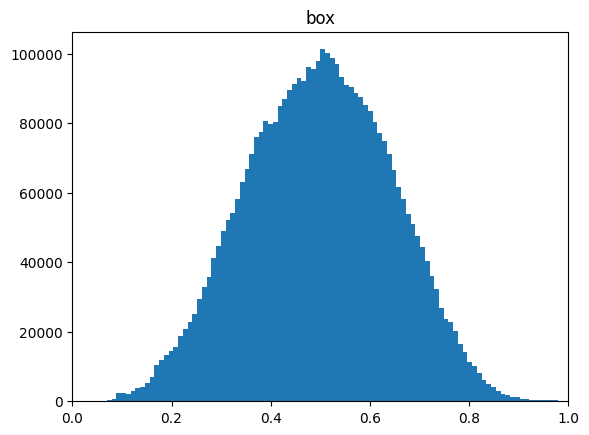

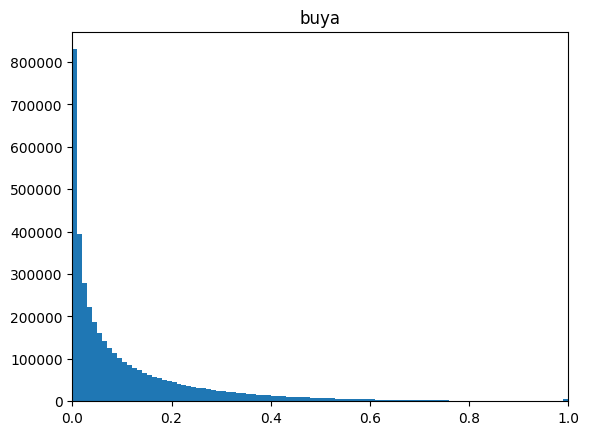

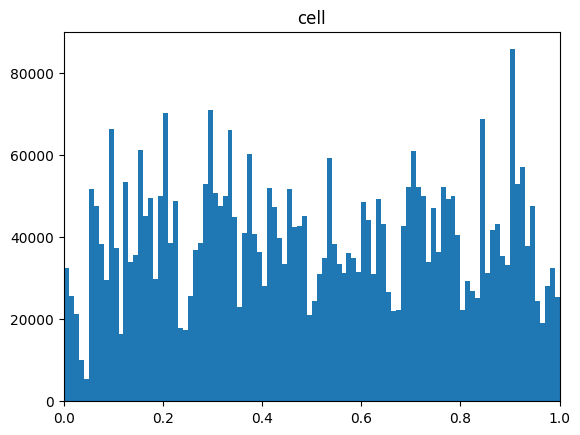

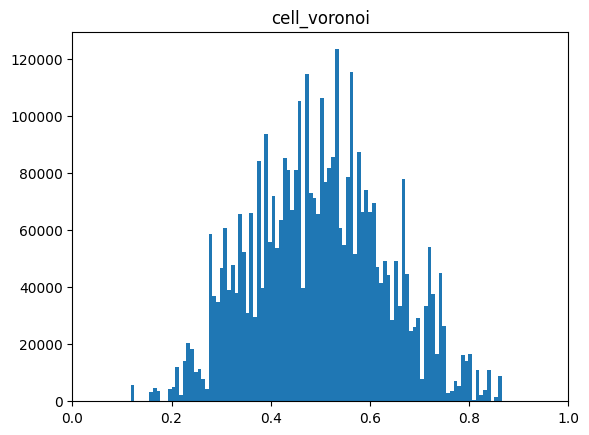

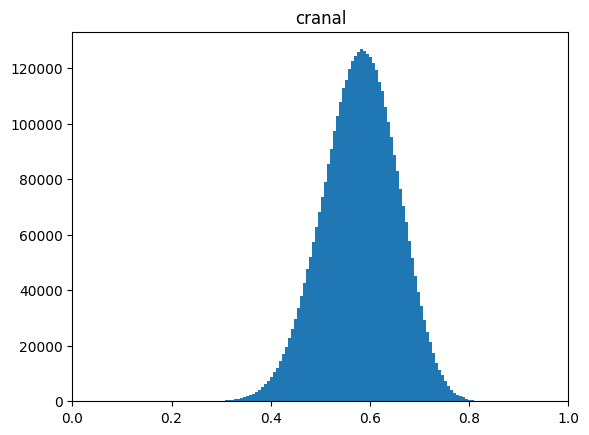

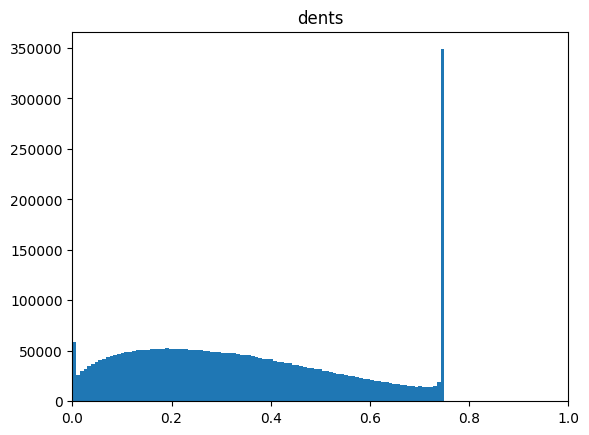

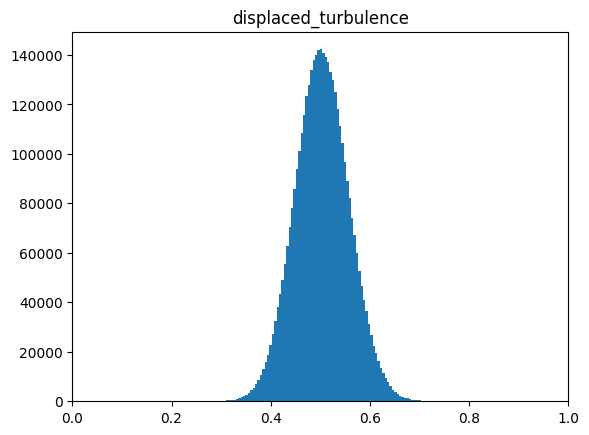

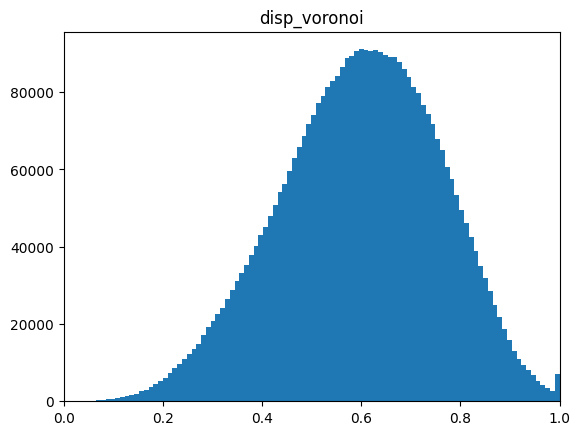

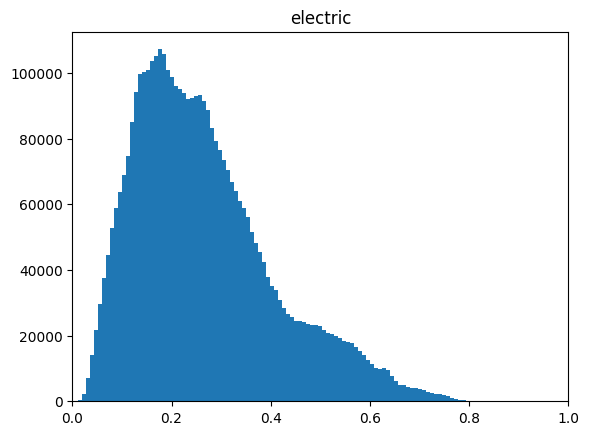

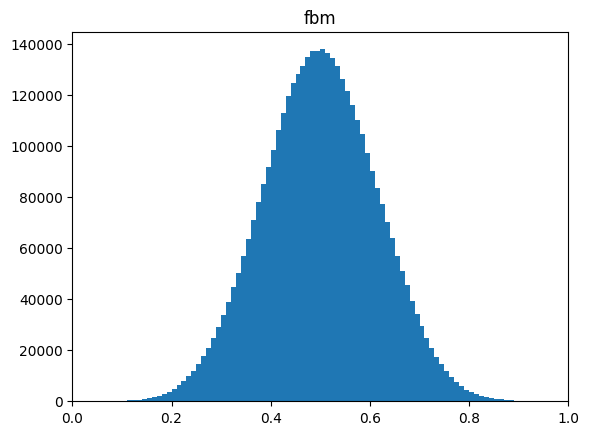

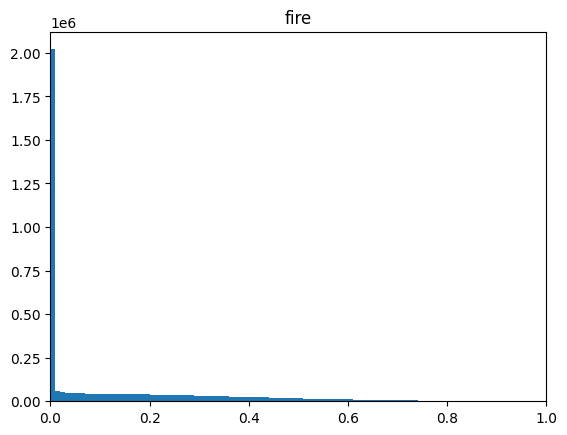

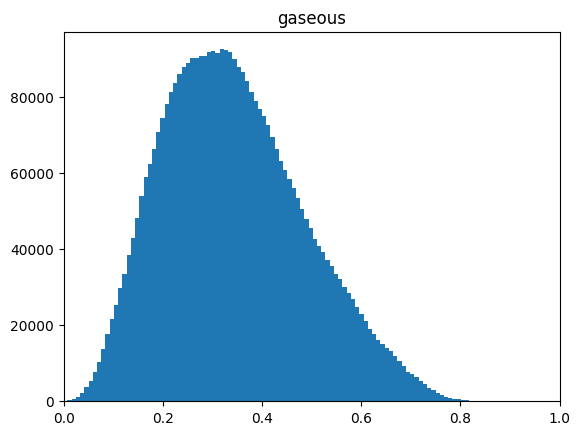

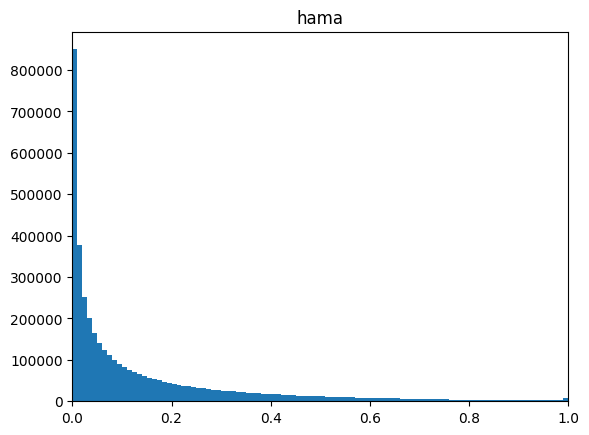

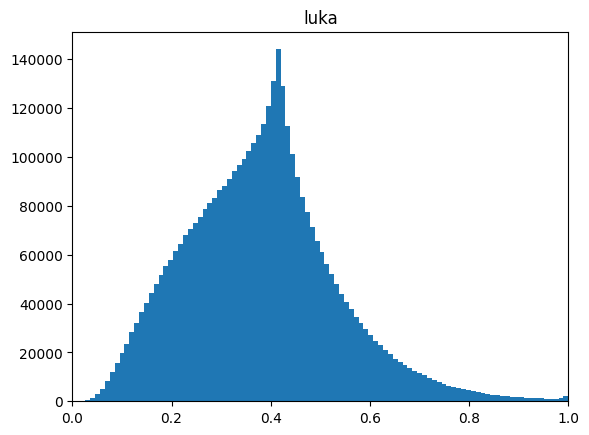

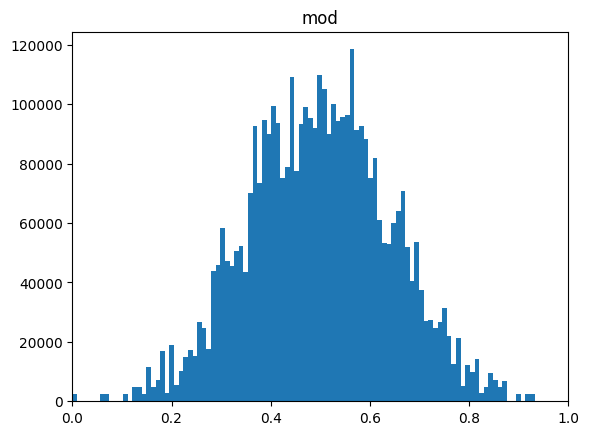

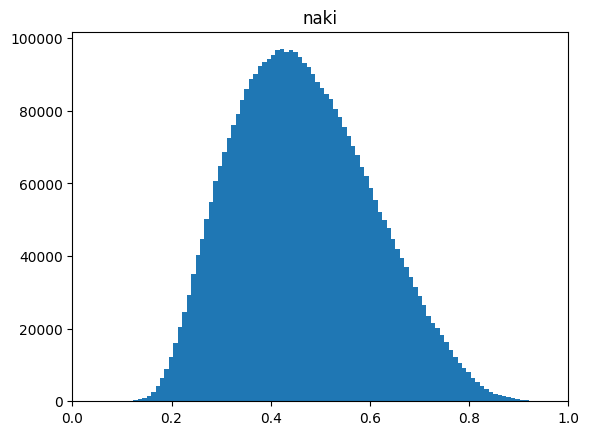

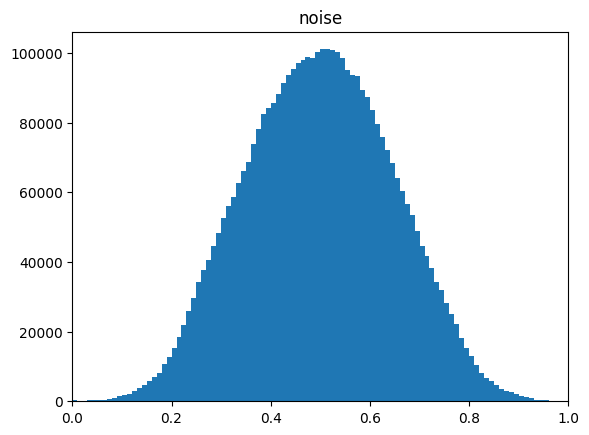

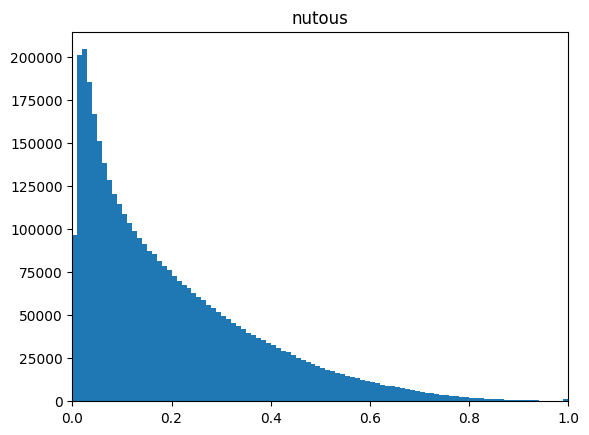

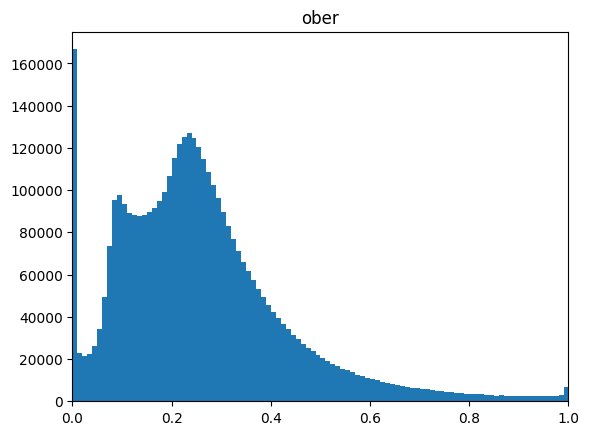

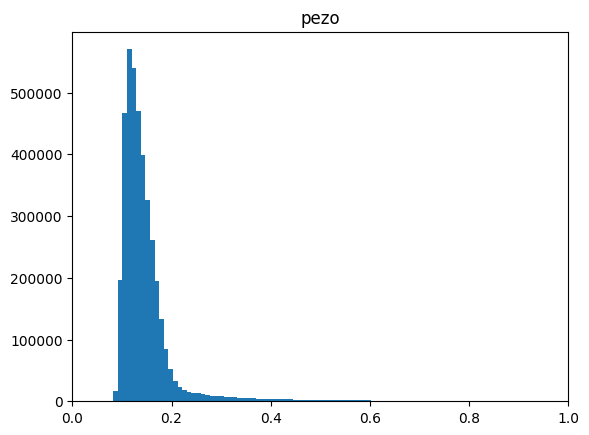

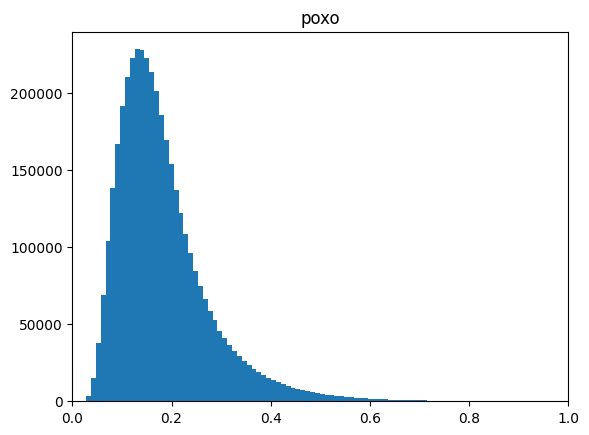

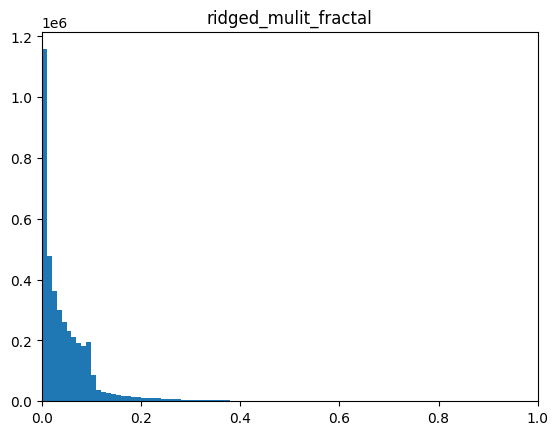

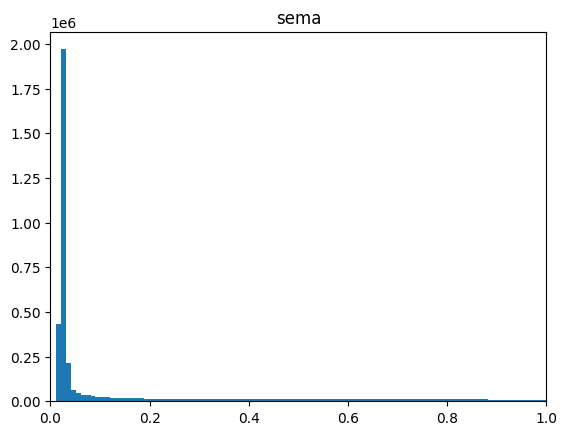

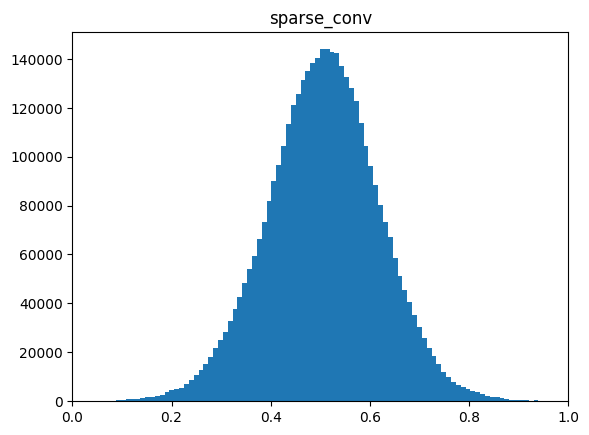

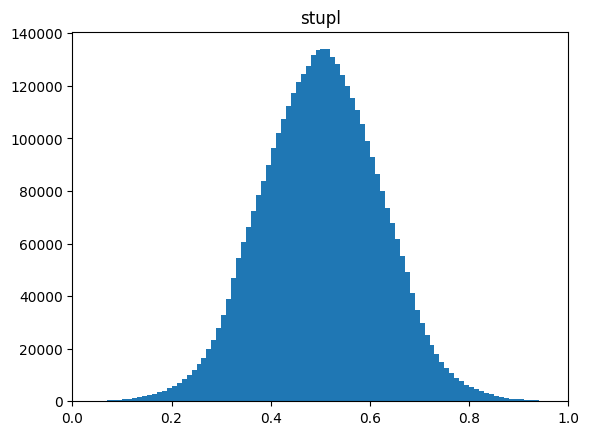

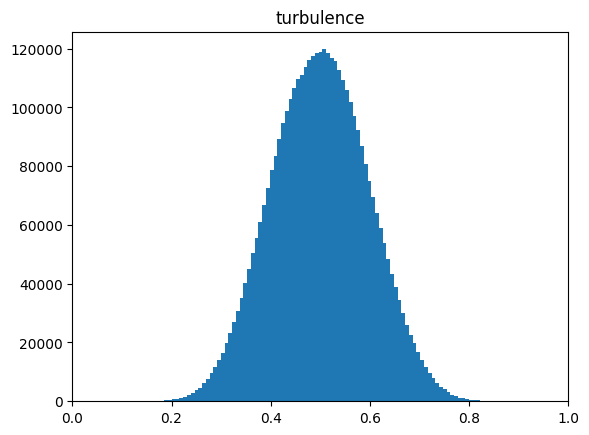

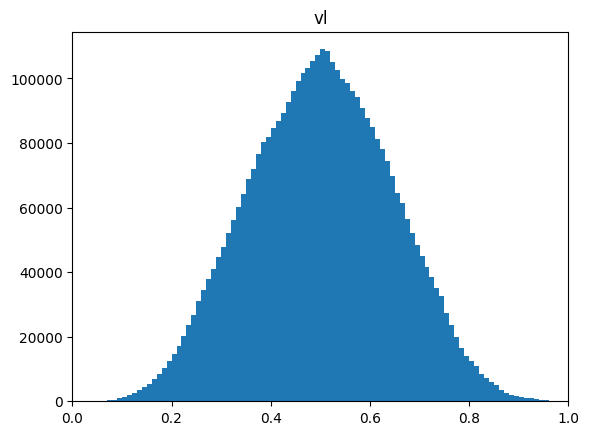

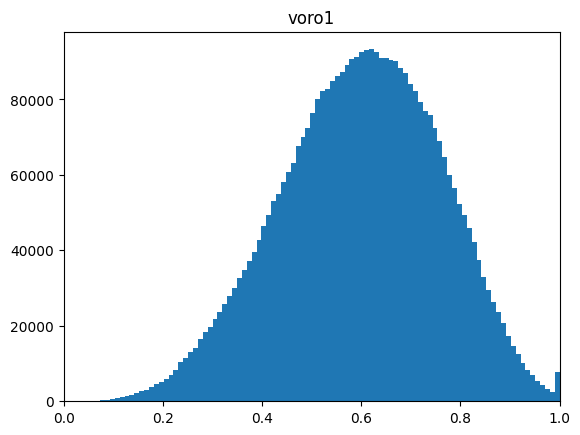

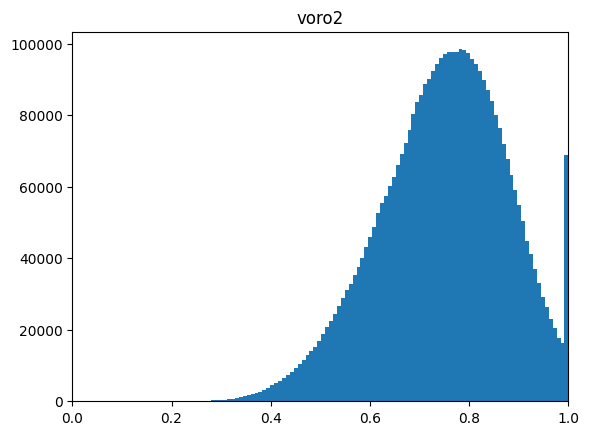

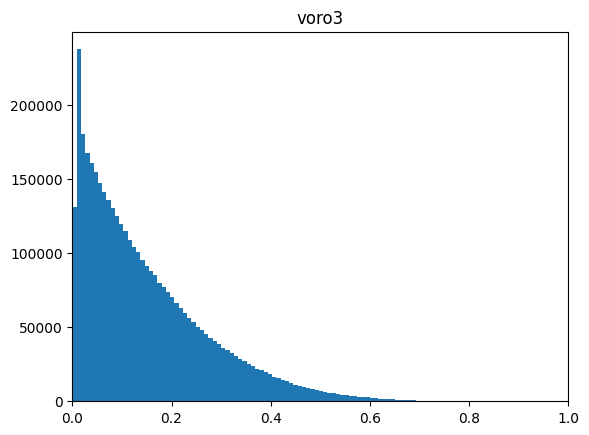

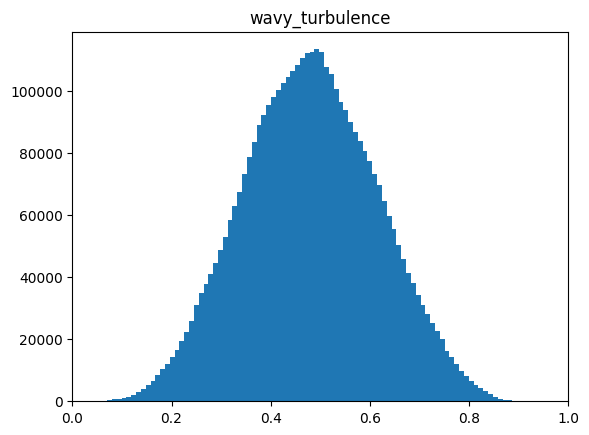

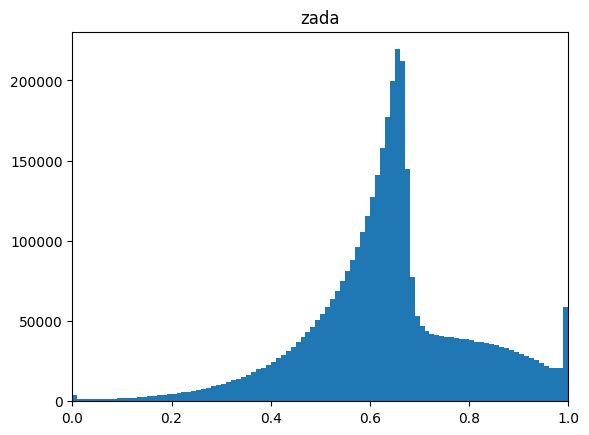

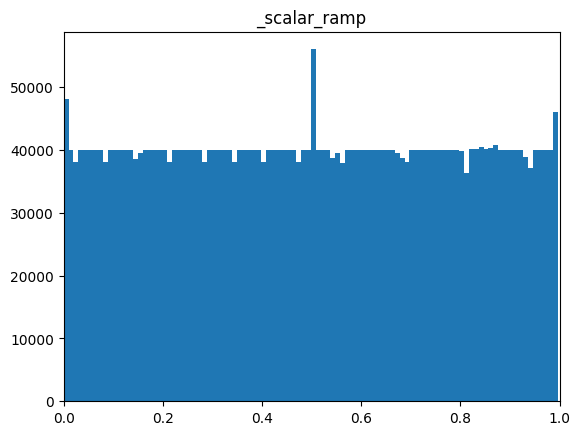

In [4]:
# for each exr file, read the pixel values into a numpy array and create a distribution graph for each
for f in files:
    img = OpenEXR.InputFile(f)
    dw = img.header()['dataWindow']
    size = (dw.max.y - dw.min.y + 1, dw.max.x - dw.min.x + 1)
    FLOAT = Imath.PixelType(Imath.PixelType.FLOAT)
    data = img.channel('R', FLOAT)
    data = np.fromstring(data, dtype=np.float32)
    data = np.reshape(data, size)
    plt.hist(data.flatten(), bins=100)
    # keep plot range between 0 and 1
    plt.xlim(0, 1)
    # split extension from filename
    f = os.path.splitext(f)[0]
    plt.title(f)
    plt.show()